In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [2]:
# Auto take path for data
path = os.getcwd()

train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Explore Data Analysis**

In [3]:
train.shape

(891, 12)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
def show_missing(data):
  ''' This function is used to show percentage of missing data. '''
  missing_values = data.isnull().sum()

  percent_missing = missing_values / data.shape[0] * 100
  percent_missing = percent_missing.round(2) 

  show_missing = pd.concat([percent_missing, data.nunique(), data.dtypes], keys=['PercentageMissing', 'Nunique values', 'Dtype'], axis = 1)

  return show_missing

show_missing(train)

,PercentageMissing,Nunique values,Dtype
PassengerId,0.00,891,int64
Survived,0.00,2,int64
Pclass,0.00,3,int64
Name,0.00,891,object
Sex,0.00,2,object
Age,19.87,88,float64
SibSp,0.00,7,int64
Parch,0.00,7,int64
Ticket,0.00,681,object
Fare,0.00,248,float64




*   3/12 columns have missing values. Age - 19.87% and Cabin - 77.10%
*    5/12 columns have object dtype converting



# Data Visualization

Survivor: 38.0 % 
Dead people: 62.0%


<AxesSubplot:xlabel='Survived', ylabel='count'>

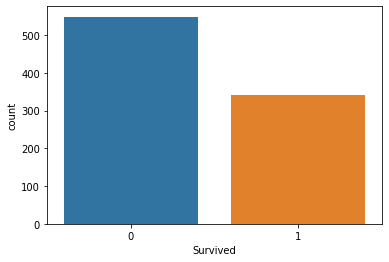

In [7]:
survivors = train[train['Survived'] == 1].shape[0]
deads = train.shape[0] - survivors

print(f'Survivor: {round(survivors / train.shape[0], 2) * 100} % \nDead people: {round(deads / train.shape[0], 2) * 100}%')

sns.countplot(data=train, x='Survived')

### Sex Column

<AxesSubplot:xlabel='Sex', ylabel='count'>

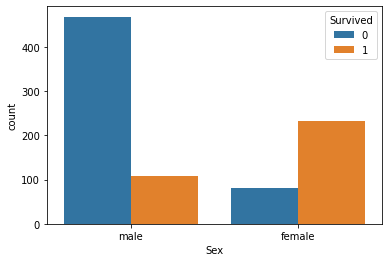

In [8]:
sns.countplot(data=train, hue='Survived', x='Sex')



*   Man have trending to not rescued




### Pclass Column

In [9]:
# Survivors rate by class
train.groupby('Pclass')['Survived'].mean().to_frame()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [10]:
print(train['Pclass'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


Text(0.5, 1.0, 'Survived or Dead by Pclass')

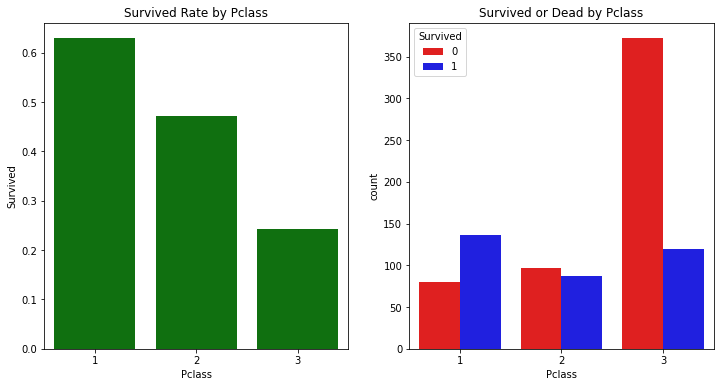

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(data=train, x='Pclass', y='Survived', palette=['green'], ci=None, ax=ax[0])
ax[0].set_title('Survived Rate by Pclass')
sns.countplot(data=train, x='Pclass', hue='Survived', palette=['red', 'blue'], ax=ax[1])
ax[1].set_title('Survived or Dead by Pclass')

Pclass
*   There were three classes on the ship and from the plot we see that the number of passengers in the third class was higher than the number of passengers in the first and second classes combined.
*   However, the survival rate by class is not the same, more than 60% of first-class passengers and around half of the second class passengers were rescued, whereas 75% of third class passengers were not able to survive the disaster.
*   For this reason, this is definitely an important aspect to consider.



### Pclass & Sex Columns

In [12]:
train.groupby(['Pclass', 'Sex']).Survived.mean().to_frame()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

Text(0.5, 1.0, 'Survival rate by Pclass and Sex')

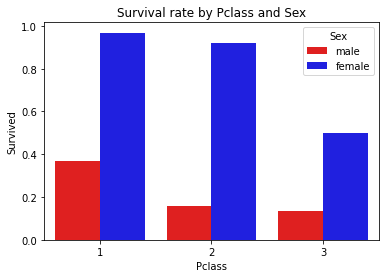

In [13]:
sns.barplot(data=train, x='Pclass', y='Survived', hue='Sex', palette=['red', 'blue'], ci=None)
plt.title('Survival rate by Pclass and Sex')



*  We can also see the survival rate by Sex and Pclass, which is quite impressive. First class and second class women who were rescued were respectively 97% and 92%, while the percentage drops to 50% for third-class women.
*  Despite that, this is still more than the 37% survival rate for first-class men.



### Age Column

In [14]:
train['Age'].value_counts().head(10)

24.0    30
22.0    27
18.0    26
28.0    25
19.0    25
30.0    25
21.0    24
25.0    23
36.0    22
29.0    20
Name: Age, dtype: int64

/home/quyanh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Age distribution for the two subpopulations'}, xlabel='Age', ylabel='Density'>

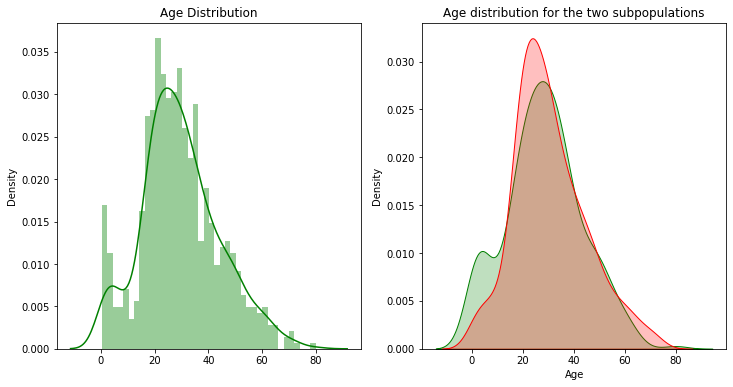

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.distplot(x=train['Age'], bins=40, kde=True, ax=ax[0], color='g')
ax[0].set_title('Age Distribution')

ax[1].set_title('Age distribution for the two subpopulations')
sns.kdeplot(train['Age'].loc[train['Survived'] == 1], color='green', ax=ax[1], shade=True, label='Survived')
sns.kdeplot(train['Age'].loc[train['Survived'] == 0], color='red', ax=ax[1], shade=True, label='Not Survived')
# ax[1].set_legends()

### Age & Sex Columns

Text(0.5, 1.0, 'Survived by age and sex')

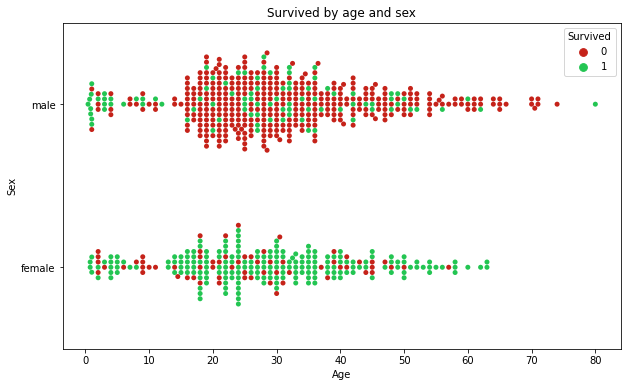

In [16]:
plt.figure(figsize=(10, 6))
sns.swarmplot(y='Sex', x='Age', hue='Survived', palette=('#C52219', '#23C552'), data=train)
plt.title('Survived by age and sex')

* At a first look, the relationship between Age and Survived appears not to be very clear, we notice for sure that there is a peak corresponding to young passengers for those who survived, but apart from that the rest is not very informative.
* We can appreciate this feature more if we consider Sex too: now it is clearer that a good number of male survivors had less than 12 years, while the female group has no particular properties.

### Fare Column

In [17]:
train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64

/home/quyanh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Survival rate')

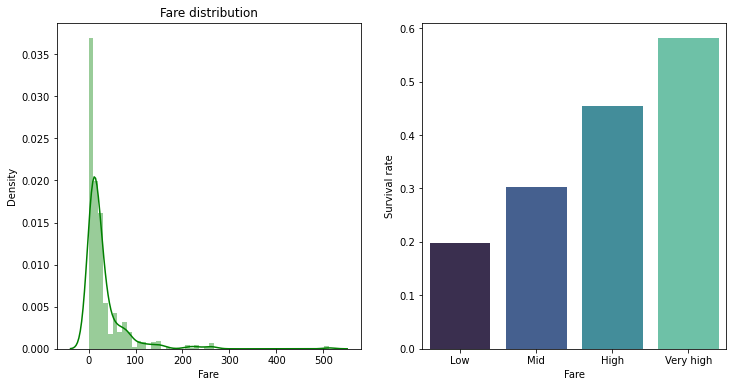

In [18]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

sns.distplot(train.Fare, color='g', ax=ax[0])
ax[0].set_title('Fare distribution')

fare_range = pd.qcut(train.Fare, 4, labels = ['Low', 'Mid', 'High', 'Very high'])
sns.barplot(x=fare_range, y=train.Survived, palette='mako', ci=None, ax=ax[1])
ax[1].set_ylabel('Survival rate')

### Fare & Sex

/home/quyanh/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/quyanh/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 48.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Survived by fare and sex')

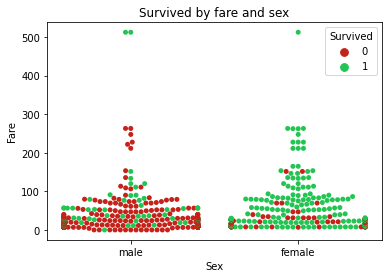

In [19]:
sns.swarmplot(x='Sex', y='Fare', hue='Survived', palette=('#C52219', '#23C552'), data=train)
plt.title('Survived by fare and sex')

* Looking at the more detailed plot, we also see for example that all males with fare between 200 and 300 died.
* For this reason, we can left the Fare feature as it is in order to prevent losing too much information; at deeper levels of a tree, a more discriminant relationship might open up and it could become a good group detector.

### SibSp and Parch Columns

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Nmember, dtype: int64


<AxesSubplot:xlabel='Nmember', ylabel='count'>

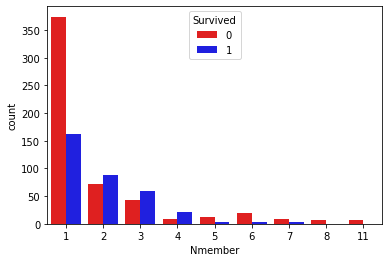

In [20]:
# Create new feature with +1 is by passenger's self
train['Nmember'] = train['SibSp'] + train['Parch'] + 1
print(train['Nmember'].value_counts())

sns.countplot(data=train, x='Nmember', hue='Survived', palette=['red', 'blue'])

### Ticket Column

In [21]:
train['Ticket'].value_counts().head(10)

CA. 2343        7
347082          7
1601            7
347088          6
CA 2144         6
3101295         6
382652          5
S.O.C. 14879    5
PC 17757        4
LINE            4
Name: Ticket, dtype: int64

In [22]:
# Calculate length of ticket
train['Ticket_len'] = train.Ticket.apply(lambda x: len(x))
train['Ticket_len'].value_counts()

6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
12     10
13     10
15      9
11      8
18      6
3       2
Name: Ticket_len, dtype: int64

### Cabin Column

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


<AxesSubplot:xlabel='Cabin', ylabel='count'>

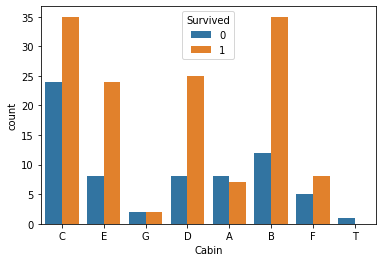

In [23]:
print(train['Cabin'].unique())

# Extrac to carbin models
train['Cabin'] = train['Cabin'].str.get(0)

sns.countplot(data=train, x='Cabin', hue='Survived')

In [24]:
train['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

S    644
C    168
Q     77
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

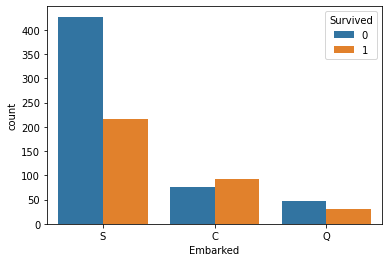

In [25]:
print(train['Embarked'].value_counts())
sns.countplot(data=train, x='Embarked', hue='Survived')

# Data Processing

In [26]:
train.drop(columns=['SibSp', 'Parch'], inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Nmember,Ticket_len
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2,9
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,C,2,8
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1,16
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C,S,2,6
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1,6


### Function for transform data

In [27]:
def remove_zero_fares(row): # Function for processing Fare column
    if row.Fare == 0:
        row.Fare = np.NaN
    return row

def age_transform(row): # Function for classifying to age groups
  if row['Age'] < 7:
    return 0
  elif (row['Age'] >= 8) & (row['Age'] < 19):
    return 1
  elif (row['Age'] >=19) & (row['Age'] < 30):
    return 2
  elif (row['Age'] >=30) & (row['Age'] < 60):
    return  3
  else:
    return 4

def fare_sex(row): # Function for relationship between Fare column and Sex column
  special_arrange = (row.Fare >= 200.0) & (row.Fare <=300.0)
  not_special_arrange = (row.Fare > 300.0) | (row.Fare < 200.0)
  if (row.Sex == 'male') & special_arrange:
    return 0
  elif (row.Sex == 'female') & special_arrange:
    return 1
  elif (row.Sex == 'male') & not_special_arrange:
    return 0
  else:
    return 1

def age_sex(row): # Function for relationship between Age column and Sex column
  special = (row.Age >=8) & (row.Age <= 12)
  not_special = (row.Age >12) | (row.Age < 8)
  if (row.Sex == 'female') & special:
    return 0
  else:
    return 1
    
def ticket_len_cat(row):  # Function for classifying to ticket's length groups
  if row.Ticket_len <= 5:
    return 0
  elif (row.Ticket_len > 5) & (row.Ticket_len <= 10):
    return 1
  else:
    return 2

In [28]:
def transform_data(data):
  data.drop(columns=['Name'])
  try:
    # Sex column
    data['nSex'] = data['Sex'].replace({'male': 0, 'female': 1})

    # Age column
    data['AgeCa'] = data.apply(age_transform, axis=1)
    AgeCa_dummies = pd.get_dummies(data['AgeCa'], prefix='AgeCa')

    # Fare column
    data = data.apply(remove_zero_fares, axis=1)
    data['Fare'].fillna(value=data['Fare'].median())
    data['FareCat'] = pd.qcut(data['Fare'], 4, labels = [ 0, 1, 2, 3])
    FareCat_dummies = pd.get_dummies(data['FareCat'], prefix='FareCat')

    # Cabin column
    data['Cabin'] = data['Cabin'].fillna(value='C')
    cabin_dummies = pd.get_dummies(data['Cabin'], prefix='Cabin')

    # Ticket's column
    data['TicketLen'] = data.apply(ticket_len_cat, axis=1)
    TicketLen_dummies = pd.get_dummies(data['TicketLen'], prefix='TicketLen')

    # Embarked column
    data['Embarked'] = data['Embarked'].dropna()
    Embarked_dummies = pd.get_dummies(data['Embarked'], prefix='Embarked')

    # Nnumber column
    Nmember_dummies = pd.get_dummies(data['Nmember'], prefix='Nmember')

    #Pclass
    Pclass_dummies = pd.get_dummies(data['Pclass'], prefix='Pclass')

    # New feature
    data['FareSex'] = data.apply(fare_sex, axis=1)

    data['AgeSex'] = data.apply(age_sex, axis=1)

    # New data
    new_data = pd.concat([data[['Survived', 'FareSex', 'AgeSex', 'nSex']],
                          AgeCa_dummies, FareCat_dummies, cabin_dummies,
                          TicketLen_dummies, Embarked_dummies, Nmember_dummies,
                          Pclass_dummies], axis=1)
  except: 
    new_data = pd.concat([data[['FareSex', 'AgeSex', 'nSex']],
                          AgeCa_dummies, FareCat_dummies, cabin_dummies,
                          TicketLen_dummies, Embarked_dummies, Nmember_dummies,
                          Pclass_dummies], axis=1)

  return new_data

In [29]:
train_data = transform_data(train)
train_data.head()

,Survived,FareSex,AgeSex,nSex,AgeCa_0,AgeCa_1,AgeCa_2,AgeCa_3,AgeCa_4,FareCat_0,...,Nmember_3,Nmember_4,Nmember_5,Nmember_6,Nmember_7,Nmember_8,Nmember_11,Pclass_1,Pclass_2,Pclass_3
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
train_data.drop(columns=['Cabin_T'], inplace=True)
train_data.shape

(891, 38)

# Train Modeling

In [31]:
from sklearn.preprocessing import MinMaxScaler
def split_data(data):
  '''Function for splitting data.
  Input: A dataframe 
  Output: X_train, X_test, y_train, y_test from dataframe input.'''

  scale = MinMaxScaler()

  X = data.drop(['Survived'], axis=1)
  X = scale.fit_transform(X)
  y = data['Survived']

  # Train_test_split of data 70% - 30%
  X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.3, random_state=365)

  return (X_train, X_test, y_train, y_test)

def base_learners_evaluation(data, base_classifiers):
  '''Function for showing different score from base classifier models.
  Input: A dataframe and a list of classifier model
  Output: A dataframe score such as accuracy score, f1 score, precision score and recall score. '''


  X_train, X_test, y_train, y_test = split_data(data)

  idx = []
  scores = {'Accuracy': [], 'F1_score': [], 'Precision': [], 'Recall': []}
  for bc in base_classifiers:
    lm = bc[1]
    lm.fit(X_train, y_train)

    prediction = lm.predict(X_test)

    idx.append(bc[0])

    scores['Accuracy'].append(accuracy_score(y_test, prediction))
    scores['F1_score'].append(f1_score(y_test, prediction))
    scores['Precision'].append(precision_score(y_test, prediction))
    scores['Recall'].append(recall_score(y_test, prediction))

  return pd.DataFrame(data=scores, index=idx)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

base_classifiers = [('Decision Tree 3', DecisionTreeClassifier(max_depth=3)),
                    ('Decision Tree 5', DecisionTreeClassifier(max_depth=5)),
                    ('Decision Tree 8', DecisionTreeClassifier(max_depth=8)),
                    ('Naive Bayes', GaussianNB()),
                    ('SVC', SVC()),
                    ('Logistic Regression', LogisticRegression(max_iter=500))]

base_learners_evaluation(train_data, base_classifiers)

,Accuracy,F1_score,Precision,Recall
Decision Tree 3,0.794776,0.662577,0.870968,0.534653
Decision Tree 5,0.794776,0.678363,0.828571,0.574257
Decision Tree 8,0.794776,0.726368,0.730000,0.722772
Naive Bayes,0.432836,0.563218,0.396761,0.970297
SVC,0.805970,0.690476,0.865672,0.574257
Logistic Regression,0.813433,0.742268,0.774194,0.712871


# Feature Selection

- We will use the following for this purpose :
    - Pearson correlation factor pearson
    - chi square test
    - f_regression
    - f_classif 

## Using Pearson Correlation factor for feature selection

<AxesSubplot:>

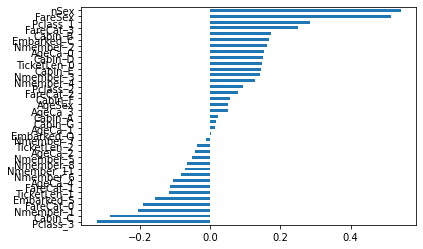

In [33]:
correlations = train_data.corr(method='pearson')['Survived'].drop('Survived')
correlations.sort_values().plot(kind='barh')

In [34]:
# Filtering features with lower absolute value than a threshold

threshold = 0.1

pearson_feature = list(correlations[abs(correlations) > threshold].index.values)
pearson_feature

['FareSex',
 'nSex',
 'AgeCa_0',
 'AgeCa_4',
 'FareCat_0',
 'FareCat_1',
 'FareCat_3',
 'Cabin_B',
 'Cabin_C',
 'Cabin_D',
 'Cabin_E',
 'TicketLen_0',
 'TicketLen_1',
 'Embarked_C',
 'Embarked_S',
 'Nmember_1',
 'Nmember_2',
 'Nmember_3',
 'Nmember_4',
 'Pclass_1',
 'Pclass_3']

In [35]:
data_corr = pd.concat([train_data[pearson_feature], train_data['Survived']], axis=1)

base_learners_evaluation(data_corr, base_classifiers)

,Accuracy,F1_score,Precision,Recall
Decision Tree 3,0.794776,0.658385,0.883333,0.524752
Decision Tree 5,0.791045,0.666667,0.835821,0.554455
Decision Tree 8,0.809701,0.730159,0.784091,0.683168
Naive Bayes,0.776119,0.680851,0.735632,0.633663
SVC,0.813433,0.709302,0.859155,0.603960
Logistic Regression,0.824627,0.761421,0.781250,0.742574


## Using chi2 test for feature selection

In [36]:
from sklearn.feature_selection import SelectKBest, chi2

# Finding the best 20 features using chi2 test
data_chi2 = pd.DataFrame(SelectKBest(chi2, k=27).fit_transform(train_data.drop(["Survived"],axis = 1),train_data["Survived"]))
data_chi2.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
2,1,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,1,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [37]:
data_chi2 = pd.concat([data_chi2, train_data['Survived']], axis=1)
base_learners_evaluation(data_chi2, base_classifiers)

,Accuracy,F1_score,Precision,Recall
Decision Tree 3,0.794776,0.662577,0.870968,0.534653
Decision Tree 5,0.794776,0.674556,0.838235,0.564356
Decision Tree 8,0.813433,0.734043,0.793103,0.683168
Naive Bayes,0.417910,0.559322,0.391304,0.980198
SVC,0.802239,0.690058,0.842857,0.584158
Logistic Regression,0.820896,0.755102,0.778947,0.732673


## Using f_classif for feature selection

In [38]:
from sklearn.feature_selection import SelectKBest, f_classif

# Find the best 20 feature by f_classif test
data_classif = pd.DataFrame(SelectKBest(f_classif, 27).fit_transform(train_data.drop(['Survived'], axis=1), train_data['Survived']))
data_classif.head()

/home/quyanh/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass k=27 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
2,1,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,1,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [39]:
data_classif = pd.concat([data_classif, train_data['Survived']], axis=1)
base_learners_evaluation(data_classif, base_classifiers)

,Accuracy,F1_score,Precision,Recall
Decision Tree 3,0.794776,0.662577,0.870968,0.534653
Decision Tree 5,0.791045,0.670588,0.826087,0.564356
Decision Tree 8,0.809701,0.730159,0.784091,0.683168
Naive Bayes,0.417910,0.559322,0.391304,0.980198
SVC,0.802239,0.690058,0.842857,0.584158
Logistic Regression,0.820896,0.755102,0.778947,0.732673


## Using f_regression for feature selection

In [40]:
from sklearn.feature_selection import SelectKBest, f_regression

# Find the best 20 feature by f_regression test
data_regression = pd.DataFrame(SelectKBest(f_regression, 27).fit_transform(train_data.drop(['Survived'], axis=1), train_data['Survived']))
data_regression.head()

/home/quyanh/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass k=27 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
2,1,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,1,1,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [41]:
data_regression = pd.concat([data_regression, train_data['Survived']], axis=1)
base_learners_evaluation(data_regression, base_classifiers)

,Accuracy,F1_score,Precision,Recall
Decision Tree 3,0.794776,0.662577,0.870968,0.534653
Decision Tree 5,0.798507,0.682353,0.840580,0.574257
Decision Tree 8,0.820896,0.741935,0.811765,0.683168
Naive Bayes,0.417910,0.559322,0.391304,0.980198
SVC,0.802239,0.690058,0.842857,0.584158
Logistic Regression,0.820896,0.755102,0.778947,0.732673


In [43]:
public_data = pd.read_csv('test.csv')
PassengerId = public_data['PassengerId']
public_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [44]:
public_data['Ticket_len'] = public_data.Ticket.apply(lambda x: len(x))
public_data['Nmember'] = public_data['SibSp'] + public_data['Parch'] + 1
public_data['Cabin'] = public_data['Cabin'].str.get(0)

In [45]:
public_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_len,Nmember
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,6,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,6,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,6,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,6,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,7,3


In [46]:
public_data.drop(columns=[ 'PassengerId', 'SibSp', 'Parch'], inplace=True)

In [47]:
X = transform_data(public_data)
X.head()

,FareSex,AgeSex,nSex,AgeCa_0,AgeCa_1,AgeCa_2,AgeCa_3,AgeCa_4,FareCat_0,FareCat_1,...,Nmember_3,Nmember_4,Nmember_5,Nmember_6,Nmember_7,Nmember_8,Nmember_11,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,1,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [48]:
X.shape

(418, 37)

# Training by ensemble model

In [49]:
def ensemble_evaluation(data, model, label='Original'):
  '''This function show score with Original data or Filtered data.'''
  X_train, X_test, y_train, y_test = split_data(data)
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)

  return pd.DataFrame({'Accuracy' : [accuracy_score(y_test, prediction)],
                       'F1_score' : [f1_score(y_test, prediction)],
                       'precision' : [precision_score(y_test, prediction)],
                       'Recall' : [recall_score(y_test, prediction)]}, index=[label])

In [50]:
from sklearn.ensemble import VotingClassifier

models_comparison = {}

ensemble = VotingClassifier(base_classifiers)     

ensemble_data_origin = ensemble_evaluation(train_data, ensemble, label='Original')
ensemble_data_filtered = ensemble_evaluation(data_corr, ensemble, label='Filtered')

models_comparison['Voting'] = pd.concat([ensemble_data_origin, ensemble_data_filtered], axis=0)

In [51]:
models_comparison['Voting']

,Accuracy,F1_score,precision,Recall
Original,0.802239,0.690058,0.842857,0.584158
Filtered,0.805970,0.690476,0.865672,0.574257


In [52]:
from sklearn.ensemble import BaggingClassifier

ensemble = BaggingClassifier(n_estimators=10,
                             base_estimator=DecisionTreeClassifier(max_depth=5))

ensemble_data_origin = ensemble_evaluation(train_data, ensemble, label='Original')
ensemble_data_filtered = ensemble_evaluation(data_corr, ensemble, label='Filtered')
models_comparison['Bagging'] = pd.concat([ensemble_data_origin, ensemble_data_filtered], axis=0)

In [53]:
models_comparison['Bagging']

,Accuracy,F1_score,precision,Recall
Original,0.805970,0.686747,0.876923,0.564356
Filtered,0.817164,0.720000,0.851351,0.623762


In [54]:
from sklearn.ensemble import AdaBoostClassifier

ensemble = AdaBoostClassifier(n_estimators=365)

ensemble_data_origin = ensemble_evaluation(train_data, ensemble, label='Original')
ensemble_data_filtered = ensemble_evaluation(data_chi2, ensemble, label='Filtered')
models_comparison['AdaBoost'] = pd.concat([ensemble_data_origin, ensemble_data_filtered], axis=0)

In [55]:
models_comparison['AdaBoost']

,Accuracy,F1_score,precision,Recall
Original,0.813433,0.744898,0.768421,0.722772
Filtered,0.828358,0.767677,0.783505,0.752475


In [56]:
from sklearn.ensemble import RandomForestClassifier

ensemble = RandomForestClassifier(n_estimators=500, max_depth=5, criterion="entropy", n_jobs=-1)

ensemble_data_origin = ensemble_evaluation(train_data, ensemble, label='Original')
ensemble_data_filtered = ensemble_evaluation(data_corr, ensemble, label='Filtered')
models_comparison['RandomForest'] = pd.concat([ensemble_data_origin, ensemble_data_filtered], axis=0)

In [57]:
models_comparison['RandomForest']

,Accuracy,F1_score,precision,Recall
Original,0.813433,0.695122,0.904762,0.564356
Filtered,0.802239,0.682635,0.863636,0.564356


In [72]:
from xgboost import XGBClassifier

ensemble = XGBClassifier()

ensemble_data_origin = ensemble_evaluation(train_data, ensemble, label='Original')
ensemble_data_filtered = ensemble_evaluation(data_corr, ensemble, label='Filtered')
models_comparison['XGBClassifier'] = pd.concat([ensemble_data_origin, ensemble_data_filtered], axis=0)

[22:09:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:09:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/quyanh/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/quyanh/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [73]:
models_comparison['XGBClassifier']

,Accuracy,F1_score,precision,Recall
Original,0.791045,0.714286,0.736842,0.693069
Filtered,0.783582,0.684783,0.759036,0.623762


In [74]:
from lightgbm import LGBMClassifier

ensemble = LGBMClassifier()

ensemble_data_origin = ensemble_evaluation(train_data, ensemble, label='Original')
ensemble_data_filtered = ensemble_evaluation(data_corr, ensemble, label='Filtered')
models_comparison['LGBMClassifier'] = pd.concat([ensemble_data_origin, ensemble_data_filtered], axis=0)

In [75]:
models_comparison['LGBMClassifier']

,Accuracy,F1_score,precision,Recall
Original,0.813433,0.731183,0.800000,0.673267
Filtered,0.809701,0.727273,0.790698,0.673267


In [76]:
# !pip install catboost
# import catboost 
# from catboost import CatBoostClassifier
# np.random.seed(42)

# ensemble = CatBoostClassifier()
# ensemble_data_origin = ensemble_evaluation(train_data, ensemble, label='Original')
# ensemble_data_filtered = ensemble_evaluation(data_corr, ensemble, label='Filtered')
# models_comparison['CatBoostClf'] = pd.concat([ensemble_data_origin, ensemble_data_filtered], axis=0)
# models_comparison['CatBoostClf']

***In general, models above is not good model for public data. Finally, i will use pipeline model for this problem***

# Use Pipeline for prediction

In [77]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Nmember,Ticket_len,nSex,AgeCa,Title,Ticket_lett
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2,9,0,2,Mr,A/
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,C,2,8,1,3,Mrs,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1,16,1,2,Miss,ST
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C,S,2,6,1,3,Mrs,11
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1,6,0,3,Mr,37


In [78]:
public_data.head()

,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Ticket_len,Nmember,nSex,AgeCa,Title,Ticket_lett
0,3,"Kelly, Mr. James",male,34.5,330911,7.8292,NaN,Q,6,1,0,3,Mr,33
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,NaN,S,6,2,1,3,Mrs,36
2,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,NaN,Q,6,1,0,4,Mr,24
3,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,NaN,S,6,1,0,2,Mr,31
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,NaN,S,7,3,1,2,Mrs,31


## Data preprocessing for pipeline model

In [79]:
# Because null value of Cabin column is so much, we will remove it from model training
public_data['Cabin'].isnull().sum()

327

In [80]:
# Creation of four groups
train['Nmember'] = pd.cut(train.Nmember, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])
public_data['Nmember'] = pd.cut(public_data.Nmember, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])

In [81]:
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

public_data['Title'] = public_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [82]:
train['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
public_data['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)

train['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)
public_data['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

In [83]:
train = train.apply(remove_zero_fares, axis=1)
train['Fare'].fillna(value=train['Fare'].median())

public_data = public_data.apply(remove_zero_fares, axis=1)
public_data['Fare'].fillna(value=public_data['Fare'].median())

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [84]:
train['Ticket_lett'] = train.Ticket.apply(lambda x: x[:2])

public_data['Ticket_lett'] = public_data.Ticket.apply(lambda x: x[:2])

In [85]:
# train['Ticket_len'] = train.apply(ticket_len_cat, axis=1)
# public_data['Ticket_len'] = public_data.apply(ticket_len_cat, axis=1)

In [86]:
# Create group for fare ticket
# train['FareCat'] = pd.qcut(train['Fare'], 4, labels = [ 0, 1, 2, 3])
# public_data['FareCat'] = pd.qcut(public_data['Fare'], 4, labels = [ 0, 1, 2, 3])

In [87]:
# train['FareSex'] = train.apply(fare_sex, axis=1)
# public_data['FareSex'] = public_data.apply(fare_sex, axis=1) 

In [88]:
# train['AgeSex'] = train.apply(age_sex, axis=1)
# public_data['AgeSex'] = public_data.apply(age_sex, axis=1)

In [89]:
y_train = train['Survived']
features = ['Pclass', 'Fare', 'Title', 'Embarked', 'Nmember', 'Ticket_len', 'Ticket_lett']
X_train = train[features]
X_train.head()

,Pclass,Fare,Title,Embarked,Nmember,Ticket_len,Ticket_lett
0,3,7.2500,Mr,S,Small,9,A/
1,1,71.2833,Mrs,C,Small,8,PC
2,3,7.9250,Miss,S,Solo,16,ST
3,1,53.1000,Mrs,S,Small,6,11
4,3,8.0500,Mr,S,Solo,6,37


In [90]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

numerical_cols = ['Fare']
categorical_cols = ['Pclass', 'Title', 'Embarked', 'Nmember', 'Ticket_len', 'Ticket_lett']

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Bundle preprocessing and modeling code 
titanic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=0, n_estimators=500, max_depth=5))
])

# Preprocessing of training data, fit model 
titanic_pipeline.fit(X_train,y_train)

print('Cross validation score: {:.3f}'.format(cross_val_score(titanic_pipeline, X_train, y_train, cv=10).mean()))

Cross validation score: 0.826


In [91]:
X_test = public_data[features]
X_test.head()

,Pclass,Fare,Title,Embarked,Nmember,Ticket_len,Ticket_lett
0,3,7.8292,Mr,Q,Solo,6,33
1,3,7.0000,Mrs,S,Small,6,36
2,2,9.6875,Mr,Q,Solo,6,24
3,3,8.6625,Mr,S,Solo,6,31
4,3,12.2875,Mrs,S,Small,7,31


In [92]:
# Preprocessing of test data, get predictions
predictions = titanic_pipeline.predict(X_test)

In [93]:
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": predictions
    })

submission.to_csv('submission.csv', index=False)

# Conclusion
  Cabin and Sex columns are not valuable for model although illustrating insight is very good. Over-reliance on these two attributes will cause the model score to decrease. So next time I will redo this predictive model in a different way. Let's look forward to it.

Note: This article has references and improvements from other notebooks on Kaggle.

## Thank you!!